In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from random import randrange, getrandbits
%matplotlib inline

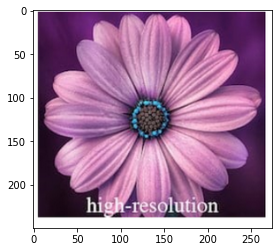

In [13]:
my_img = cv2.imread('originalImage.png')
# cv2_imshow(my_img)
plt.imshow(my_img)

In [14]:
def power(a,d,n):
  ans=1;
  while d!=0:
    if d%2==1:
      ans=((ans%n)*(a%n))%n
    a=((a%n)*(a%n))%n
    d>>=1
  return ans;


def MillerRabin(N,d):
  a = randrange(2, N - 1)
  x=power(a,d,N);
  if x==1 or x==N-1:
    return True;
  else:
    while(d!=N-1):
      x=((x%N)*(x%N))%N;
      if x==1:
        return False;
      if x==N-1:
        return True;
      d<<=1;
  return False;


In [15]:
def is_prime(N,K):
  if N==3 or N==2:
    return True;
  if N<=1 or N%2==0:
    return False;
  
  #Find d such that d*(2^r)=X-1
  d=N-1
  while d%2!=0:
    d/=2;

  for _ in range(K):
    if not MillerRabin(N,d):
      return False;
  return True;  
  



def generate_prime_candidate(length):
  # generate random bits
  p = getrandbits(length)
  # apply a mask to set MSB and LSB to 1
  # Set MSB to 1 to make sure we have a Number of 1024 bits.
  # Set LSB to 1 to make sure we get a Odd Number.
  p |= (1 << length - 1) | 1
  return p

In [16]:
def generatePrimeNumber(length):
  A=4
  while not is_prime(A, 128):
        A = generate_prime_candidate(length)
  return A



length=5
P=generatePrimeNumber(length)
Q=generatePrimeNumber(length)

print(P)
print(Q)

29
23


In [17]:
N=P*Q
eulerTotient=(P-1)*(Q-1)
print(N)
print(eulerTotient)

667
616


In [18]:
def GCD(a,b):
  if a==0:
    return b;
  return GCD(b%a,a)

E=generatePrimeNumber(4)
while GCD(E,eulerTotient)!=1:
  E=generatePrimeNumber(4)
print(E)

13


In [19]:
def gcdExtended(E,eulerTotient):
  a1,a2,b1,b2,d1,d2=1,0,0,1,eulerTotient,E

  while d2!=1:

    # k
    k=(d1//d2)

    #a
    temp=a2
    a2=a1-(a2*k)
    a1=temp

    #b
    temp=b2
    b2=b1-(b2*k)
    b1=temp

    #d
    temp=d2
    d2=d1-(d2*k)
    d1=temp

    D=b2

  if D>eulerTotient:
    D=D%eulerTotient
  elif D<0:
    D=D+eulerTotient

  return D


D=gcdExtended(E,eulerTotient)
print(D)

237


In [20]:
row,col=my_img.shape[0],my_img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]
row


250

In [21]:
col

275

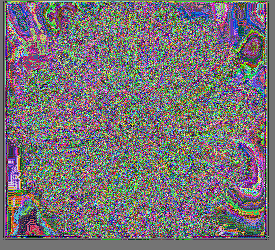

In [22]:
for i in range(0,250):
  for j in range(0,275):
    r,g,b=my_img[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    my_img[i,j]=[C1,C2,C3]


cv2_imshow(my_img)

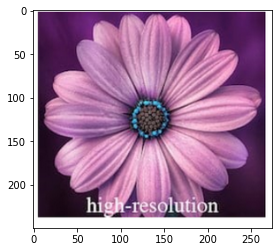

In [25]:
#Step 6: Decryption
for i in range(0,250):
  for j in range(0,275):
    r,g,b=enc[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    my_img[i,j]=[M1,M2,M3]

#cv2_imshow(my_img)
plt.imshow(my_img)